In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
import scipy.linalg as la
import matplotlib.animation as ani
from scipy import sparse
import scipy.sparse.linalg as spla

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = 0.05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{0.2 - |x-0.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.
Plot the approximation at $t=0, t=0.4$, and $t=1$.

In [2]:
M,J = 10,6 #number of subintervals in each dimension
a_x,b_x = 0,1 #end points in each dimension
a_t,b_t = 0,1
nu = 0.05 #coeff in heat eqn
k = (b_t-a_t) / M #time step
h = (b_x-a_x) / J #space step
lambd = (nu*k)/(h**2) #lambda
x_grid = np.linspace(a_x,b_x,J+1)
t_grid = np.linspace(0,1,M+1)

In [3]:
A = np.zeros((J+1, J+1)) #build time stepping matrix
np.fill_diagonal(A, 1-2*lambd)
A[0,0], A[-1,-1] = 1,1
np.fill_diagonal(A[1:,:-1], lambd)
np.fill_diagonal(A[:-1, 1:], lambd)
A[0,1],A[-1,-2] = 0,0

In [4]:
f = lambda x: 2*np.max(((.2 - np.abs(x - .5)), 0)) #auxiliary condition
f = np.vectorize(f)

u0 = f(x_grid)

U = np.zeros((M+1,J+1))
U[0] = u0 #incorporate the auxiliary condition

for j in range(M):
    U[j+1] = A@U[j]

<IPython.core.display.Javascript object>


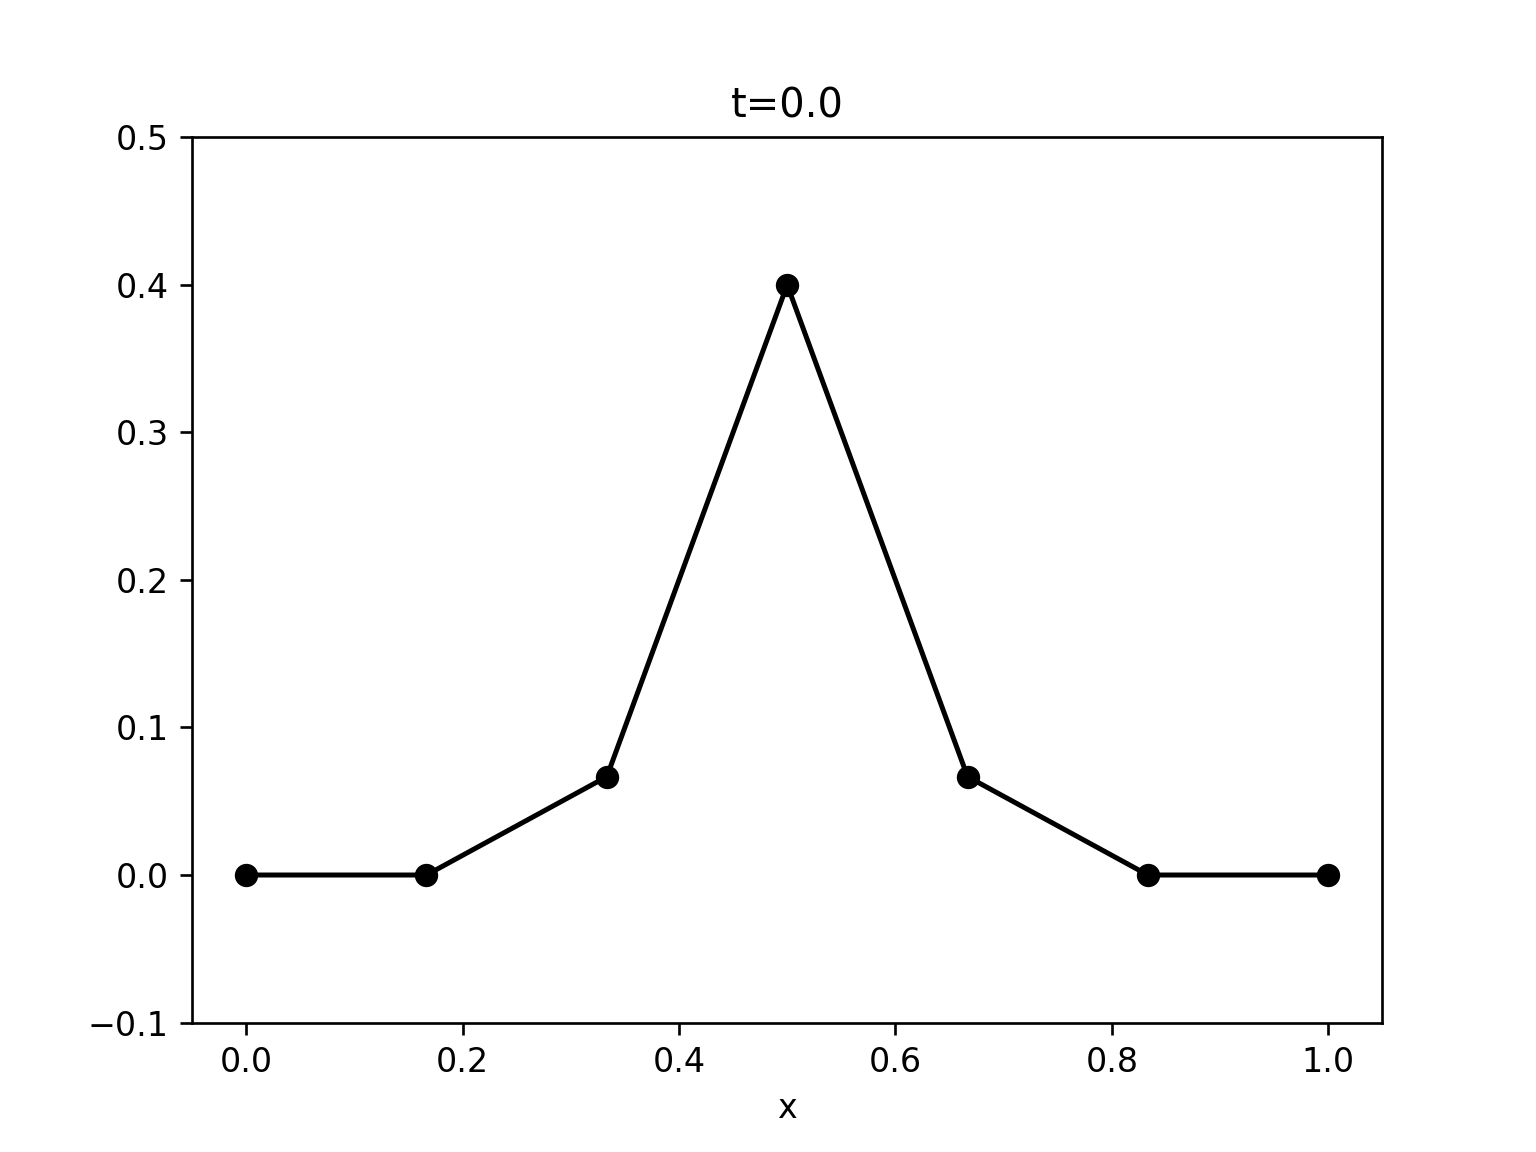

<IPython.core.display.Javascript object>


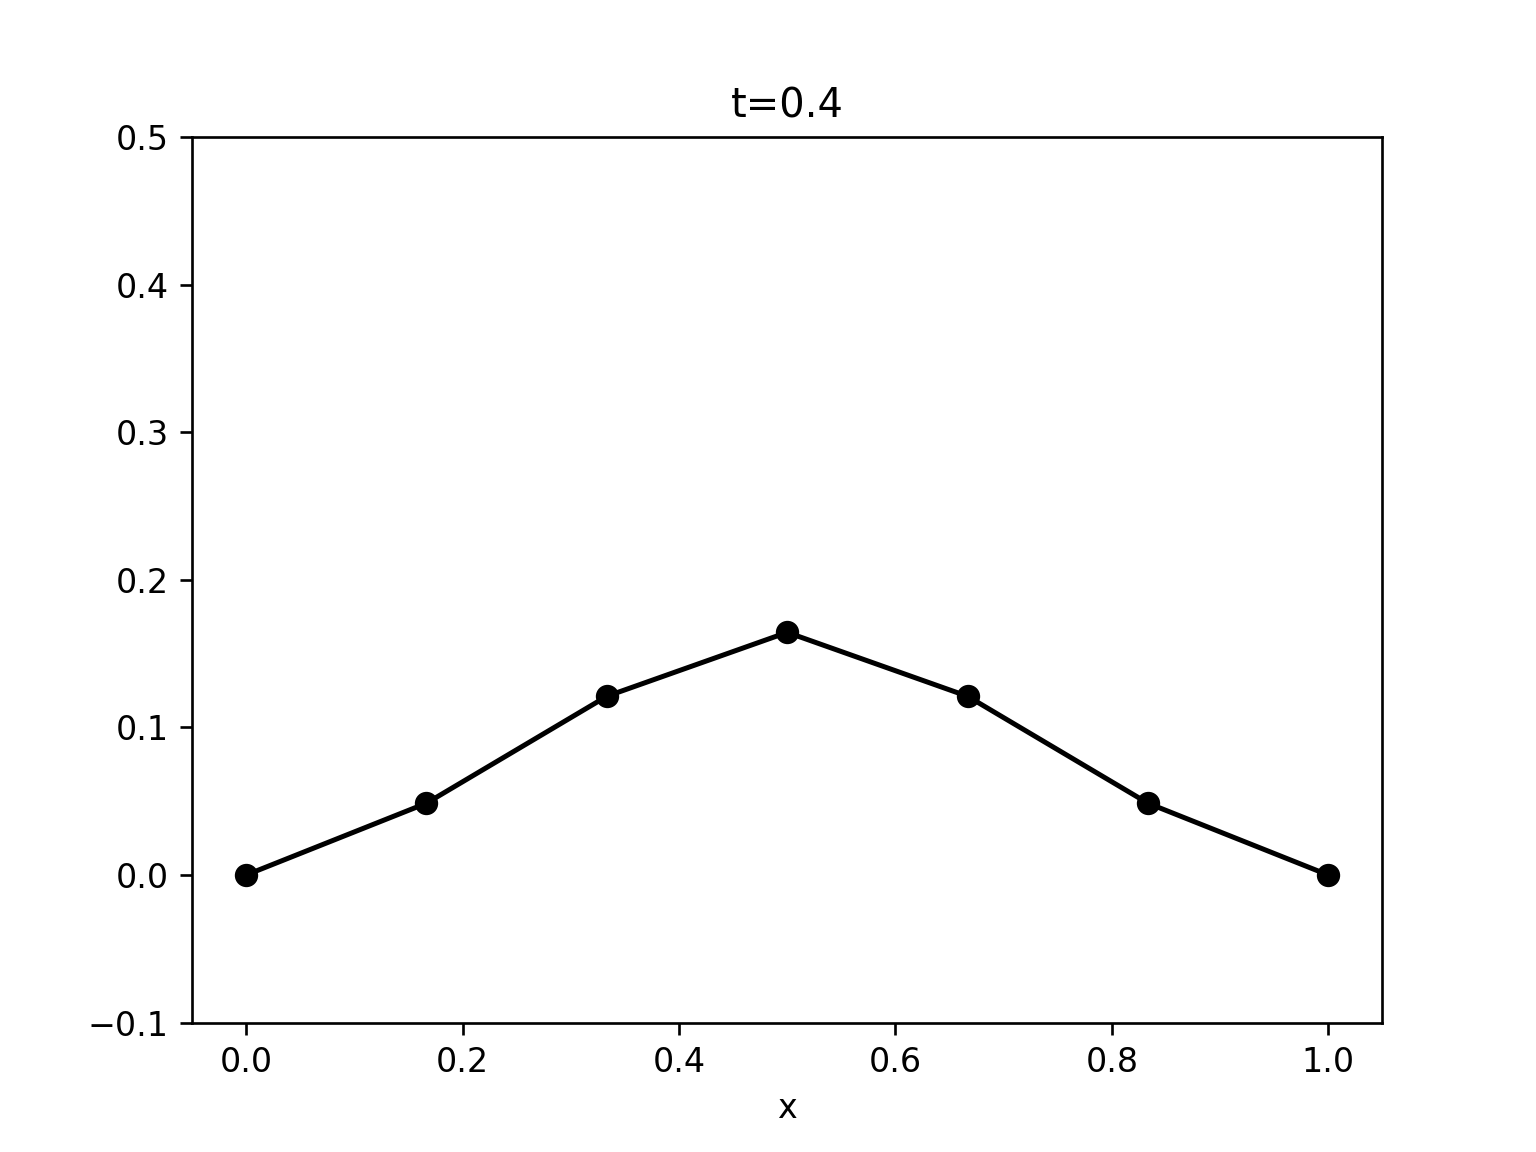

<IPython.core.display.Javascript object>


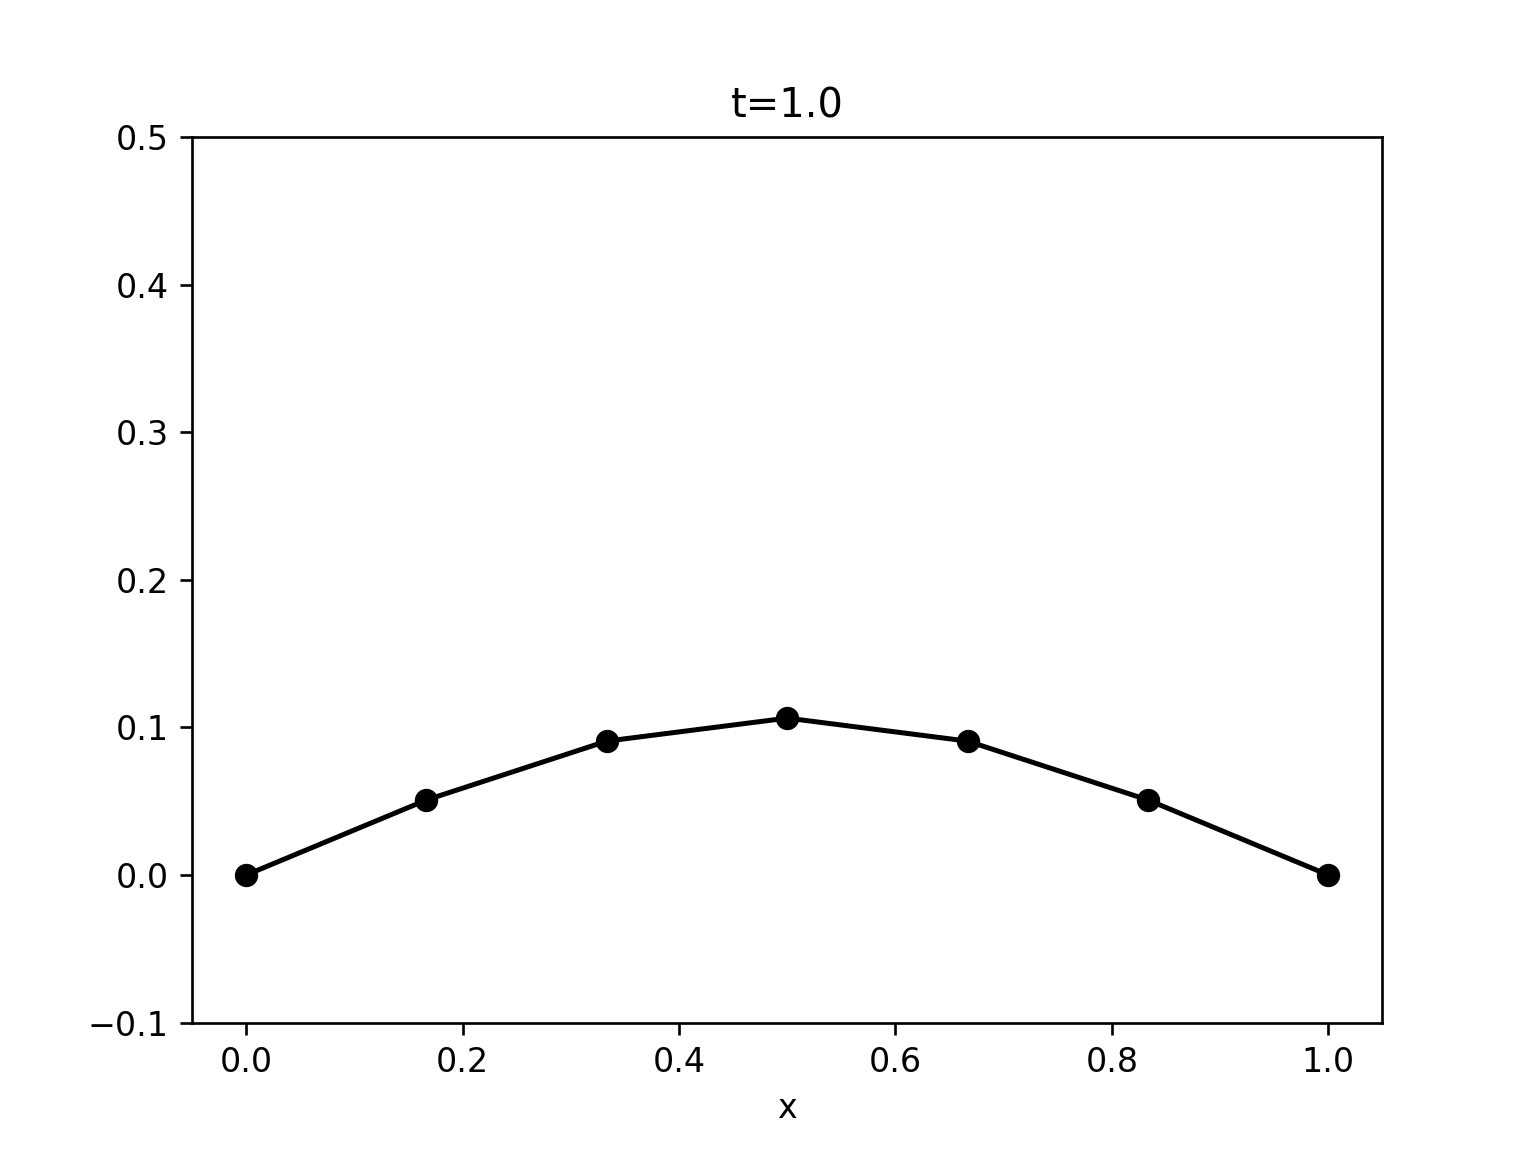

In [5]:
plt.plot(x_grid,U[0],marker='o', color='black')
plt.title(f"t={t_grid[0]}")
plt.xlabel("x")
plt.ylim([-.1,.5])
plt.show()

plt.plot(x_grid,U[4],marker='o', color='black')
plt.title(f"t={t_grid[4]}")
plt.xlabel("x")
plt.ylim([-.1,.5])
plt.show()

plt.plot(x_grid,U[-1],marker='o', color='black')
plt.title(f"t={t_grid[-1]}")
plt.xlabel("x")
plt.ylim([-.1,.5])
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


In [6]:
a_x, b_x = -12,12
a_t, b_t = 0,1
M,J = 70,140 #satisfy CFL
t_grid,x_grid = np.linspace(a_t,b_t,M+1), np.linspace(a_x,b_x,J+1)
nu = 1 #different coeff in heat eqn
k = (b_t-a_t) / M
h = (b_x-a_x) / J
lambd = (nu*k)/(h**2)

In [7]:
A = np.zeros((J+1, J+1)) #build same time stepping matrix, just with a different lambda
np.fill_diagonal(A, 1-2*lambd)
A[0,0], A[-1,-1] = 1,1
np.fill_diagonal(A[1:,:-1], lambd)
np.fill_diagonal(A[:-1, 1:], lambd)
A[0,1],A[-1,-2] = 0,0

In [8]:
f = lambda x: np.max(((1-x**2), 0))
f = np.vectorize(f)

u0 = f(x_grid)

U = np.zeros((M+1,J+1))
U[0] = u0

for j in range(M):
    U[j+1] = A@U[j]

<IPython.core.display.Javascript object>


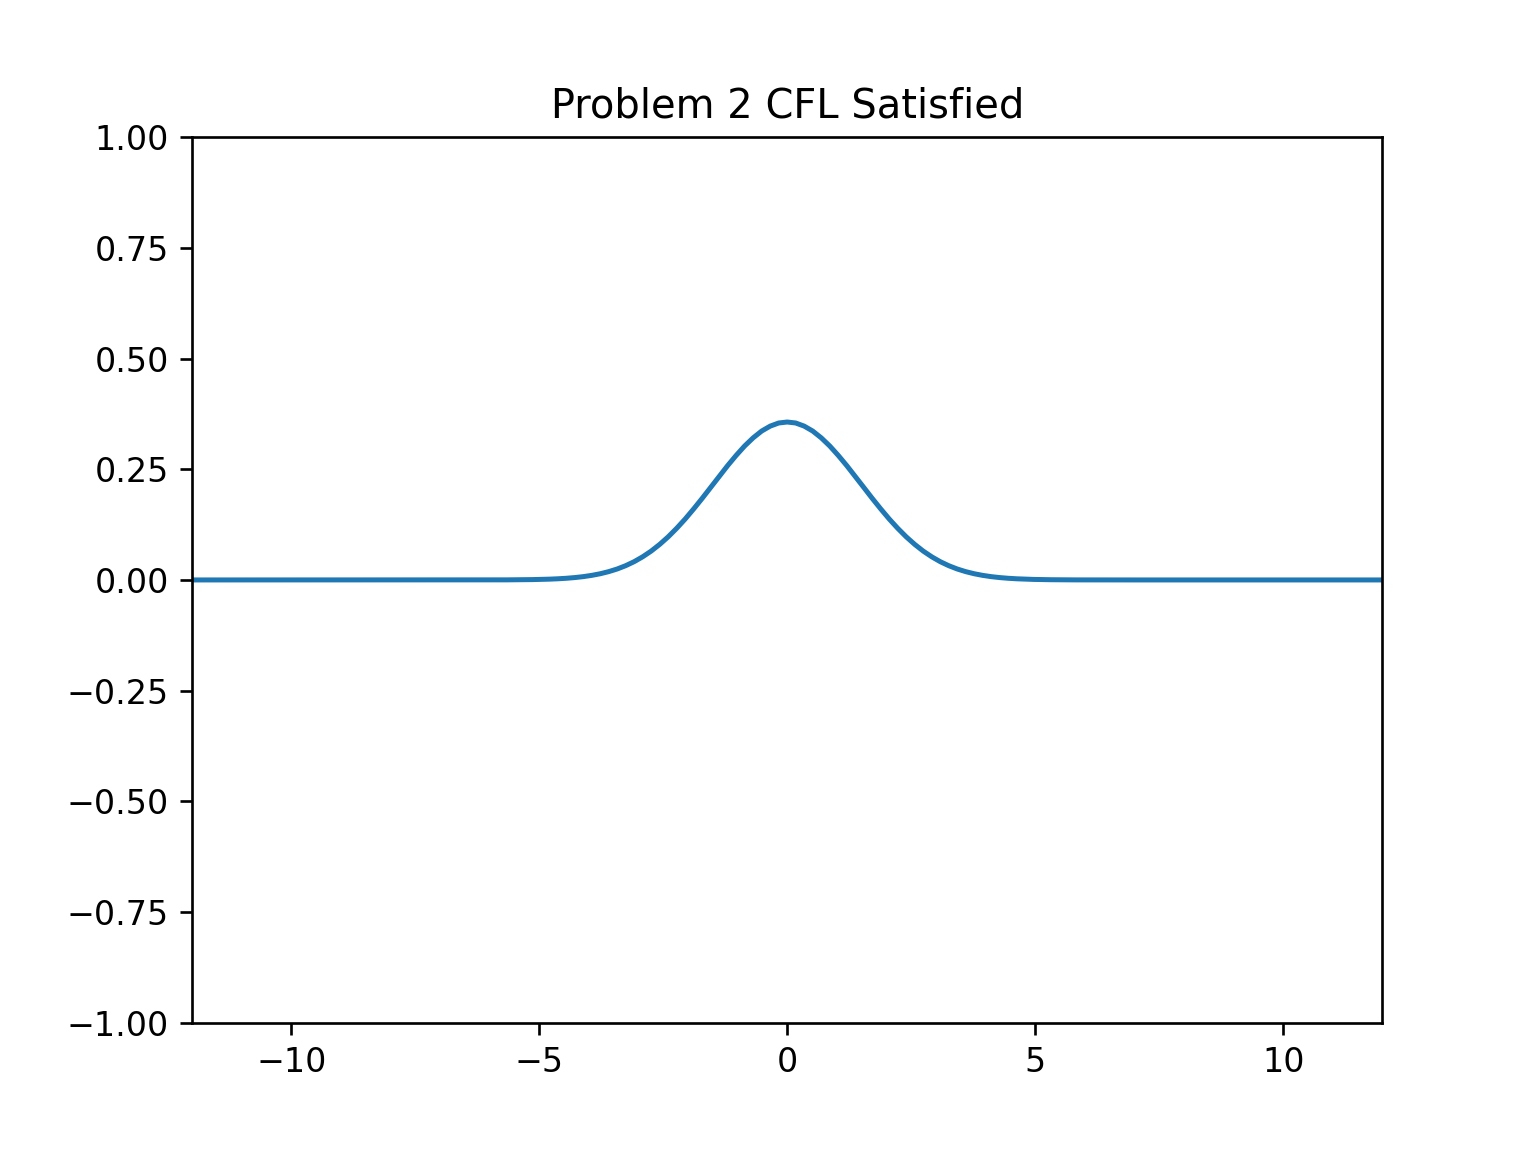

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-12,12))
ax.set_ylim((-1,1))
ax.set_title("Problem 2 CFL Satisfied")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('heat_equation1.mp4')

<video src="heat_equation1.mp4" controls>

<IPython.core.display.Javascript object>


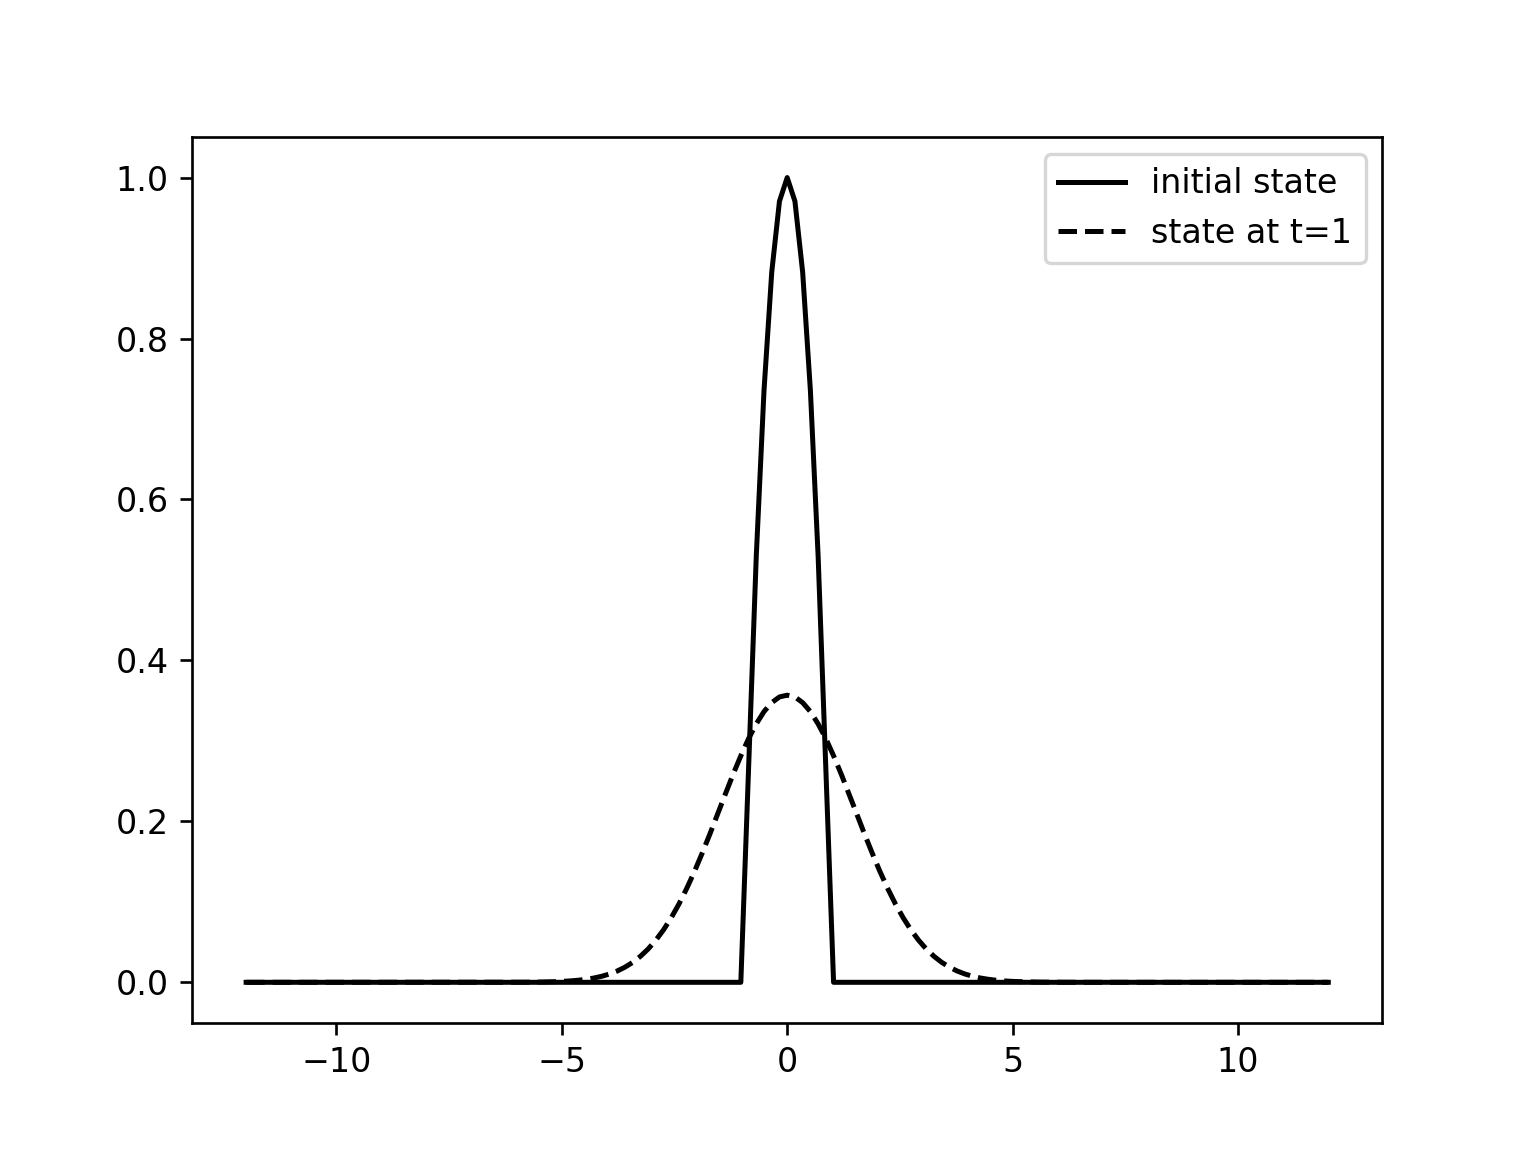

In [10]:
plt.plot(x_grid,U[0], label="initial state",color="black")
plt.plot(x_grid,U[-1],label="state at t=1",color="black",linestyle="dashed")
plt.legend()
plt.show()

In [11]:
a_x, b_x = -12,12
a_t, b_t = 0,1
M,J = 66,140 #mess it all up now by violating the CFL condition
t_grid,x_grid = np.linspace(a_t,b_t,M+1), np.linspace(a_x,b_x,J+1)
nu = 1
k = (b_t-a_t) / M
h = (b_x-a_x) / J
lambd = (nu*k)/(h**2)

A = np.zeros((J+1, J+1))
np.fill_diagonal(A, 1-2*lambd)
A[0,0], A[-1,-1] = 1,1
np.fill_diagonal(A[1:,:-1], lambd)
np.fill_diagonal(A[:-1, 1:], lambd)
A[0,1],A[-1,-2] = 0,0

f = lambda x: np.max(((1-x**2), 0))
f = np.vectorize(f)

u0 = f(x_grid)

U = np.zeros((M+1,J+1))
U[0] = u0

for j in range(M):
    U[j+1] = A@U[j]

<IPython.core.display.Javascript object>


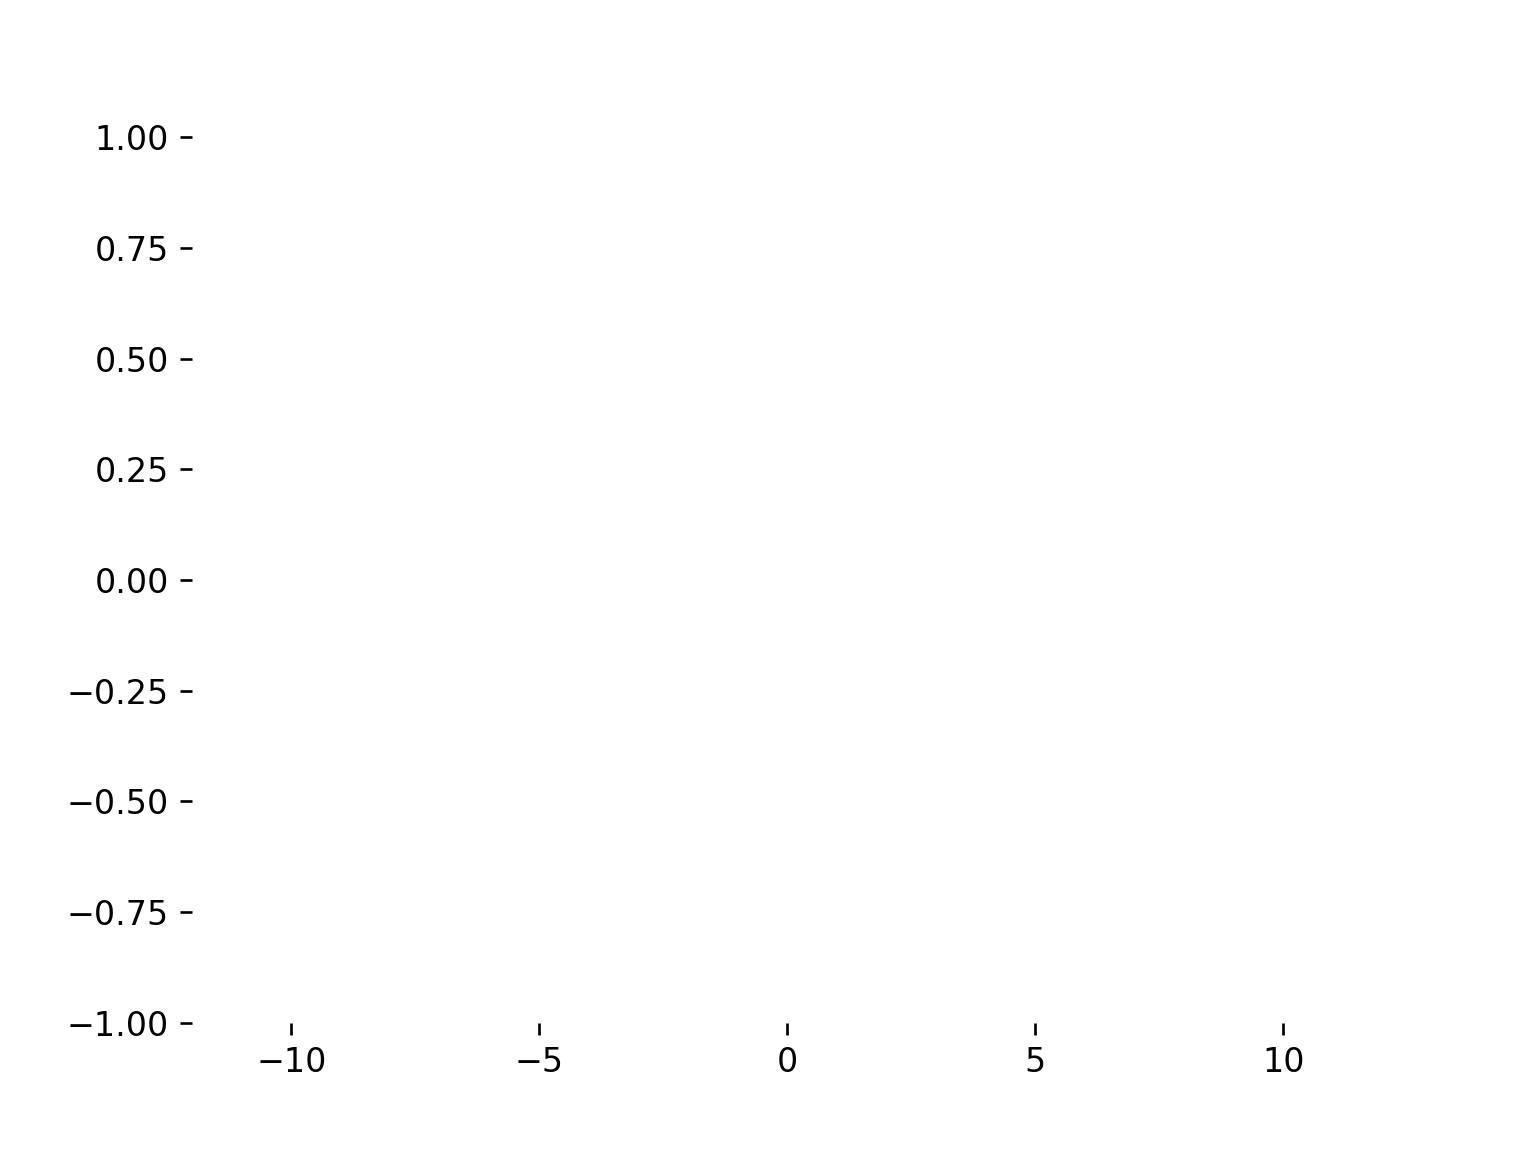

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-12,12))
ax.set_ylim((-1,1))
ax.set_title("Problem 2 CFL Violated")

line, = plt.plot([],[],)

def update(i):
    line.set_data(x_grid,U[i])
    return line

plt.show()

anim = ani.FuncAnimation(fig,update,frames=range(M+1),interval=10)
anim.save('heat_equation2.mp4')

<video src='heat_equation2.mp4' controls>

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem
\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}
Note that this is an implicit linear scheme; hence, the most efficient way to find $U^{j+1}$ is to create the matrix $B$ as a sparse matrix and then use \li{scipy.sparse.linalg.solve}.

Demonstrate that the numerical approximation at $t = 1$ converges.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in the lab.
The slope of the line there shows the order of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition, and we can safely use the same number of intervals in time and space.

In [13]:
def heat_cn(nu,f,xbounds,tbounds,xsteps,tsteps):
    """Computes the Crank-Nicholson solution to the heat equation initial/boundary
    value problem:
    
        u_t = νu_xx, x∈[x0,x1] t∈[t0,t1]
        u(x0,t) = 0, u(x1,t) = 0
        u(x,0) = f(x)
    """
    a_x, b_x = xbounds
    a_t, b_t = tbounds
    M,J = tsteps,xsteps
    t_grid,x_grid = np.linspace(a_t,b_t,M+1), np.linspace(a_x,b_x,J+1)
    k = (b_t-a_t) / M
    h = (b_x-a_x) / J
    lambd = (nu*k)/(2*h**2) #lambda in the crank nicholson method
    
    A = np.zeros((J+1, J+1)) #build time first time stepping matrix
    np.fill_diagonal(A, 1-2*lambd)
    A[0,0], A[-1,-1] = 1,1
    np.fill_diagonal(A[1:,:-1], lambd)
    np.fill_diagonal(A[:-1, 1:], lambd)
    A[0,1],A[-1,-2] = 0,0
    
    B = np.zeros((J+1, J+1)) #build second time stepping matrix
    np.fill_diagonal(B, 1+2*lambd)
    B[0,0], B[-1,-1] = 1,1
    np.fill_diagonal(B[1:,:-1], -lambd)
    np.fill_diagonal(B[:-1, 1:], -lambd)
    B[0,1],B[-1,-2] = 0,0
    
    u0 = f(x_grid)
    U = np.zeros((M+1, J+1))
    U[0] = u0
    
    A = sparse.csr_matrix(A)
    B = sparse.csr_matrix(B)
    
    for j in range(M):
        U[j+1] = spla.spsolve(B,A@U[j]) #solve SPARSE linear system to get solution at next time step
    
    return U

In [14]:
nu = 1
xbounds = [-12,12]
tbounds = [0,1]

steps_lists = [20,40,80,160,320,640] #number of steps we will perform
h_list = [(xbounds[1]-xbounds[0])/(k) for k in steps_lists]
h_sq = [h**2 for h in h_list]
U_1_sec = []

f = lambda x: np.max(((1-x**2), 0))
f = np.vectorize(f)

for i,steps in enumerate(steps_lists):
    mask = (2**i)*np.arange(21) #allows us to make comparisons at the right time points
    U = heat_cn(nu,f,xbounds,tbounds,steps,steps)
    U_1_sec.append(U[-1][mask])
    
soln = U_1_sec[-1]

In [15]:
errs = [np.max(np.abs(U_1_sec[i]-soln)) for i in range(len(U_1_sec)-1)]

<IPython.core.display.Javascript object>


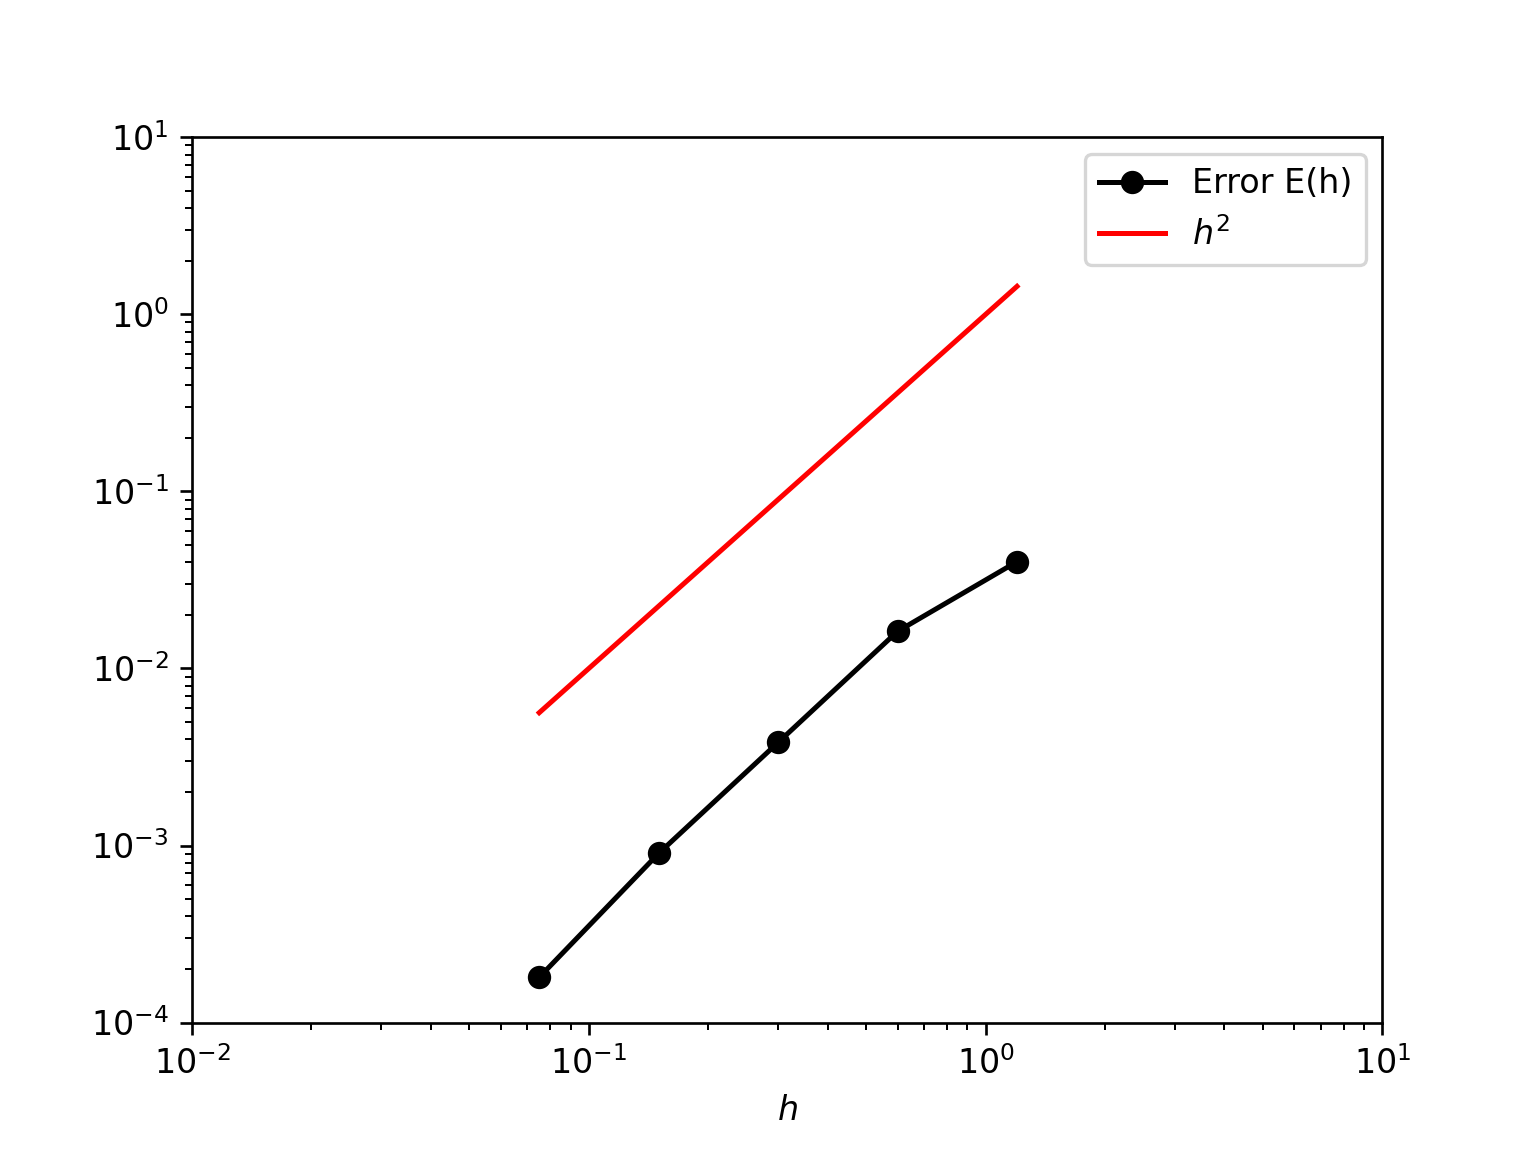

In [16]:
plt.loglog(h_list[:-1],errs,label="Error E(h)",color="black",marker="o")
plt.loglog(h_list[:-1],h_sq[:-1],label="$h^{2}$",color="r")
plt.xlabel('$h$')
plt.ylim(10e-5, 10)
plt.xlim(10e-3, 10)
plt.legend()
plt.show()